<a href="https://colab.research.google.com/github/wizard339/education/blob/main/data_structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Элементарные структуры данных
В этом разделе рассмотрены представления динамических множеств простейшими структурами данных, в которых используются указатели.

## 1 Стеки и очереди

представляют собой динамические множества, элементы которых удаляются с помощью предварительно определенной операции Delete.

Первым из ***стека (stack)*** удаляется элемент, который был помещен туда последним (стратегия "последним вошел - первым вышел" или "last-in, first-out - ***LIFO***").

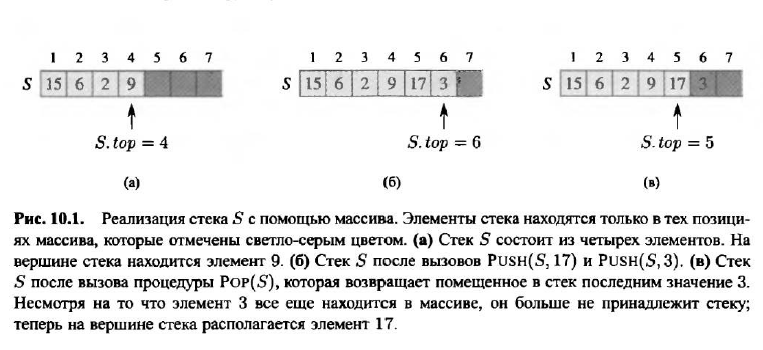

Аналогично в ***очереди (queue)*** всегда удаляется элемент, который содержится в множестве дольше других (стратегия "первым вошел - первым вышел" или "first-in, first-out - **FIFO**").

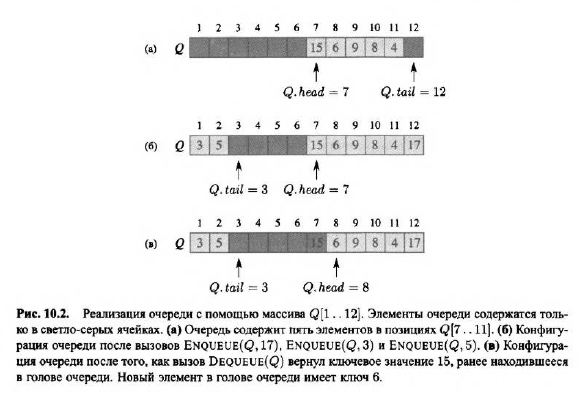

***Время работы*** при выполнении стандартных операций в стеке и очереди ***O(1)***.

In [ ]:
class Stack:

    def __init__(self):
        self.stack = []
        self.top = len(self.stack)

    def stack_empty(self):
        if self.top == 0: return True
        else: return False

    def push(self, x):
        self.top += 1
        self.stack.append(x)

    def pop(self):
        if self.stack_empty():
            raise 'underflow'
        else:
            self.top -= 1
            return self.stack.pop()

b = Stack()
print(b.top)
print(b.stack_empty())
b.push(5)
print(b.top)
print(b.pop())
print(b.top)
b.push(5)
b.push(5)
print(b.top)

0
True
1
5
0
2


In [ ]:
class Queue:
    def __init__(self, n=100):
        self.queue = [None] * n
        self.length = n
        self.head = 0
        self.tail = 0
        self.size = 0

    def queue_empty(self):
        """method for checking for emptiness of the queue"""
        return self.size == 0

    def queue_full(self):
        """method for checking the completeness of the queue"""
        return self.size == self.length
    
    def enqueue(self, x):
        """method of inserting an item into the queue"""
        if self.queue_full():
            print('The queue is full!')
            return
        self.queue[self.tail] = x
        self.tail += 1
        self.size += 1
        print(f'Added value: {x}')

    def dequeue(self):
        """method of removing an item from the queue"""
        if self.queue_empty():
            print('The queue is empty!')
            return None
        x = self.queue[self.head]
        self.head += 1
        self.size -= 1
        print(f'Removed value: {x}')
        return x

    def peek(self):
        """method of getting the first item from the queue without deleting it"""
        if self.queue_empty():
            print('The queue is empty!')
            return
        return self.queue[self.head]


b = Queue(5)
b.enqueue(1)
b.enqueue(2)
print(b.peek())
print(b.dequeue())
print(b.peek())

Added value: 1
Added value: 2
1
Removed value: 1
1
2


## 2 Связанные списки (linked lists)
Это структура данных, в которой объекты расположены в линейном порядке. Однако, в отличие массива, в котором этот порядок определяется индексами, порядок в связанном списке определяется указателями на каждый объект.

Связанные списки могут быть разных видов: однократно или дважды связанным, отсортированным или неотсортированным, кольцевым или некольцевым.

### 2.1 Дважды связанный список (doubly linked list)
Каждый элемент такого списка имеет атрибуты: ***key*** и атрибуты-указатели ***next*** и ***prev***.

Если атрибут prev равен None, то элемент является ***головным (head)*** в списке.

Если атрибут next равен None, то элемент является ***хвостовым (tail)*** в списке.

Время работы операций:

*   ***search - Θ(n)***
*   ***insert - O(1)***
*   ***delete (по указателю на объект) - O(1)***
*   ***delete (по ключу) - Θ(n)***

В последнем случае сначала необходимо выполнить операцию search для поиска удаляемого элемента, поэтому время работы увеличивается.



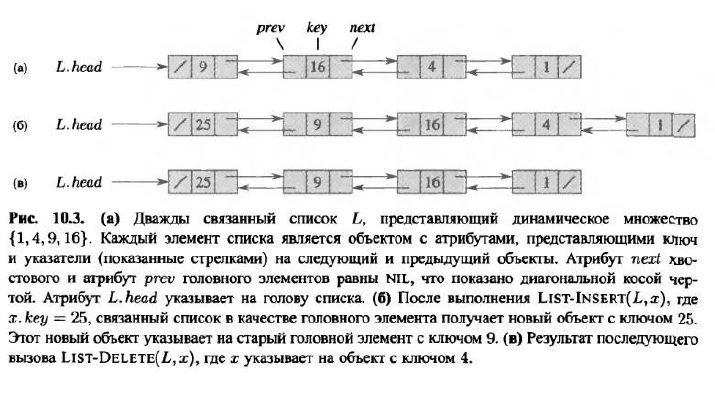

In [ ]:
class Node:
    """
    The class for node of the linked list.
    
    Description of the attributes of the class:
    `key` is the data of the node;
    `next` is the pointer on the next node in the linked list;
    `prev` is the pointer on the previous node in the linked list
    """
    def __init__(self, data):
        self.key = data
        self.next = None
        self.prev = None

    def compare(self, value):
        """the method to compare the value with the node"""
        if self.data == value:
            return True
        else:
            return False


class DoubleLinkedList:
    """
    The class for a doubly linked list.
    The attribute `head` is the pointer on the first node.
    """
    def __init__(self):
        self.head = None

    def search(self, k):
        """the method of searching for a node by node's data"""
        x = self.head
        while x is not None and x.key != k:
            x = x.next
        try:
            if x.key == k:
                return x
        except:
            raise KeyError('This item is not in the list!')

    def insert(self, x):
        """the method of inserting node in the head of the list"""
        if not isinstance(x, Node):
            x = Node(x)
        x.next = self.head
        if self.head is not None:
            self.head.prev = x
        self.head = x
        x.prev = None

    def delete_by_item(self, x):
        """the method of deleting node by the node's pointer"""
        if x.prev is not None:
            x.prev.next = x.next
        else:
            self.head = x.next
        if x.next is not None:
            x.next.prev = x.prev

    def delete_by_key(self, k):
        """the method of deleting node by the node's data"""
        x = self.search(k)
        self.delete_by_item(x)


node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
linked_list = DoubleLinkedList()
linked_list.insert(node1)
linked_list.insert(node2)
linked_list.insert(node3)
print(linked_list.search(2))
print(node2)
linked_list.insert(10)
print(linked_list.search(10))
linked_list.delete_by_item(node2)
linked_list.delete_by_key(10)
# print(linked_list.search(10))


### 2.2 Однократно связанный список (однонаправленный) (singly linked list)
Указатель prev в его элементах отсутствует.

## 3 Представления корневых деревьев

### 3.1 Бинарные деревья
Для хранения указателей на родительский, дочерний левый и правый узлы бинарного дерева T используются аттрибуты ***p, left и right***.

Если ***x.p = None***, то ***x - корень дерева***.
Если ***x.left = None***, то x не имеет левого дочернего узла, аналогично и для правого узла.

Аттрибут ***T.root*** указывает на корневой узел дерева T. Если T.root = None, то дерево T пустое.

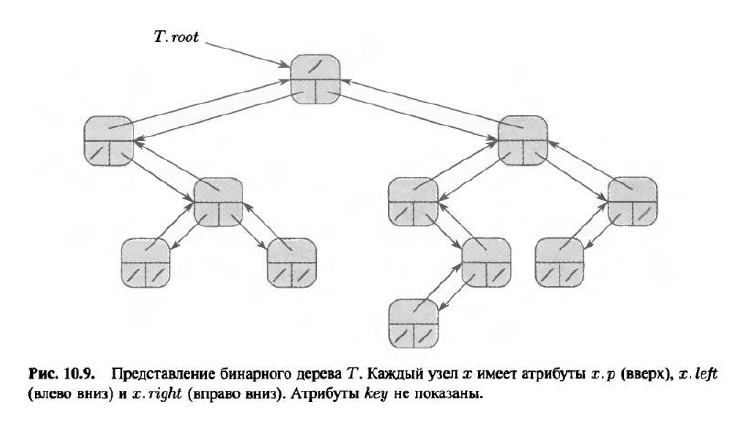

### 3.2 Корневые деревья с произвольным ветвлением
Представление с левым дочерним и правым сетринским узлами (left-child, right-sibling representation) имеет в каждом узле указатель ***p*** на родительский узел, а атрибут **T.root** указывает на корень дерева T. Вместо указателей на каждый дочерний узел содержится всего два указателя:


1. ***x.left-child***, указывающий на крайний слева дочерний узел узла x;
2. ***x.right-sibling***, указывающий на узел, расположенный на одном уровне с узлом x, справа от него и непосредственно рядом с ним.



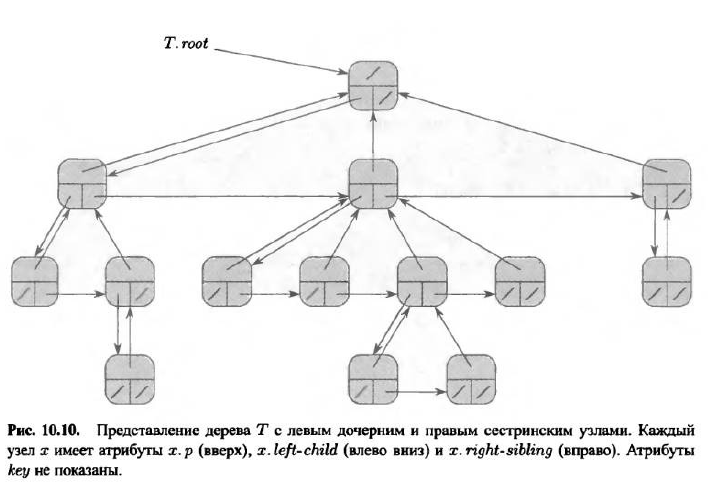

# Хеширование и хеш-таблицы

## 1 Таблицы с прямой адресацией

Для представления динамического множества можно использовать ***таблицу с прямой адресацией***, ***T[0...m-1]***, в которой каждая ячейка соответствует ключу из совокупности ключей ***U***.

Ячейка ***k*** указывает на элемент множества с ключом ***k***. Если множество не содержит элемента с ключом k, то T[k] = None.

***Время выполнения*** словарных операций (поиск, вставка, удаление) - ***O(1)***.

**Недостаток**: если совокупность ключей U велика, то хранение таблицы T размером |U| непрактично. Кроме того, множество K реально сохраненных ключей может быть мало по сравнению с совокупностью ключей U, а в этом случае память, выделенная для таблицы T, в основном расходуется напрасно.

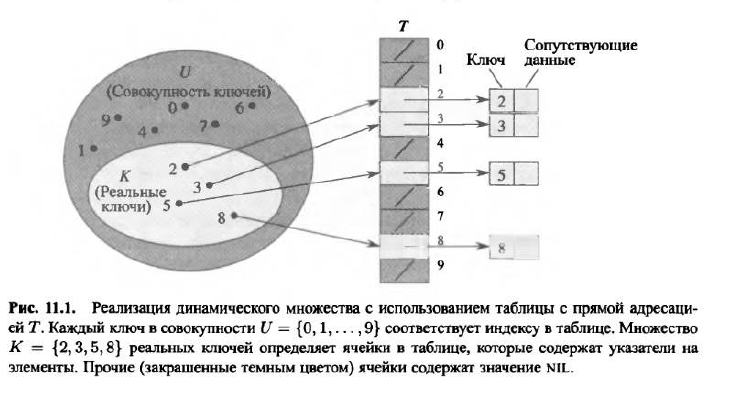

## 2 Хеш-таблицы

При хешировании элемент хранится в ячейке h(k), т.е. используется ***хеш-функция h*** для вычисления ячейки для данного ключа *k*. Функция *h* отображает совокупность ключей U на ячейки хеш-таблицы *T[0...m-1]*:


> ***h: U ⟶ {0, 1, ..., m-1}***,

где размер *m* хеш-таблицы обычно гораздо меньше значения *|U|*.

Элемент с ключом *k* ***хешируется*** в ячейку *h(k)*. Величина ***h(k)*** называется ***хеш-значением*** ключа *k*.

***Цель хеш-функции*** состоит в том, чтобы уменьшить рабочий диапазон индексов массива, и вместо размер *|U|* значений можно обойтись массивом всего лишь размером *m*.



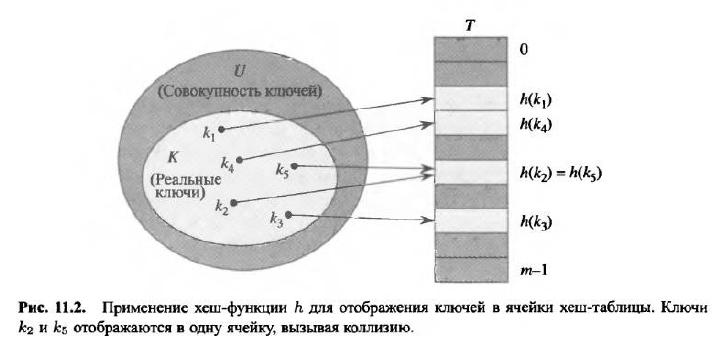

***Проблема***: два ключа могут быть хешированы в одну и ту же ячейку, т.е. возникает ***коллизия***.

### Разрешение коллизий с помощью цепочек

При разрешении коллизий **с помощью цепочек** все элементы, хешированные в одну и ту же ячейку, помещаются в связанный список.

Ячейка ***j*** содержить указатель на головной элемент связанного списка всех элементов, хеш-значение ключа которых равно *j*. Если таких элементов нет, то ячейка содержить значение None.

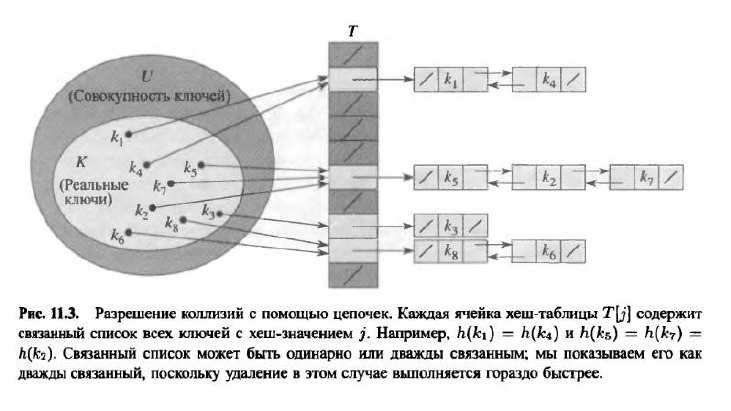

***Время поиска*** в среднем случае в предположении простого равномерного хеширования составляет ***Θ(1 + α)***, где α - коэффициент заполнения хеш-таблицы, равное n/m, т.е среднему количеству элементов, хранящееся в одной цепочке.

Если количество ячеек m в хеш-таблице как минимум пропорционально количеству элементов n, хранящихся в ней, то время поиска будет равно ***O(1)***.

### Разрешение коллизий методом открытой адресации

В данном методе в ячейках хранятся сами элементы, а в случае коллизии происходит последовательность проб, то есть мы начинаем по некоторому алгоритму перебирать ячейки в надежде найти свободную. Это можно делать разными алгоритмами (линейное / квадратичное исследование, двойное хеширование), каждый из которых обладает своими проблемами.

#### Линейное исследование
Пи линейном исследовании вычисляется ячейка, и если она занята, то алгоритм последовательно исследует следующие ячейка до конца таблицы. Если пустая ячейка не найдена, то поиск производится с первой ячейки до начально рассчитанной.

Проблема - ***первичная кластеризация***: создание длинных последовательностей занятых ячеек.

Использует хеш-функцию вида:
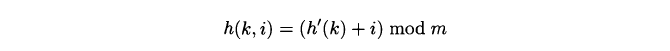

#### Квадратичное исследование
Вычисляется начальная исследуемая ячейка, и если она занята, то остальные исследуемые позиции смещены относительно начальной на величины, которые описываются квадратичной зависимостью от номера ячейки.

Проблема - ***вторичная кластеризация***.

Использует хеш-функцию вида:
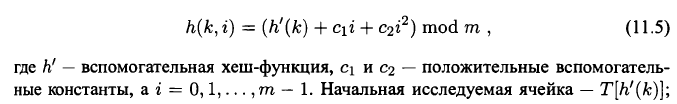

#### Двойное хеширование


Использует хеш-функцию вида:
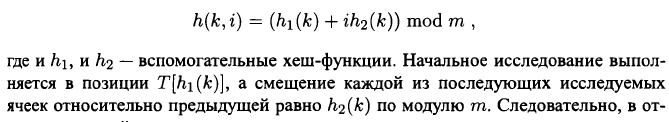

Пример:



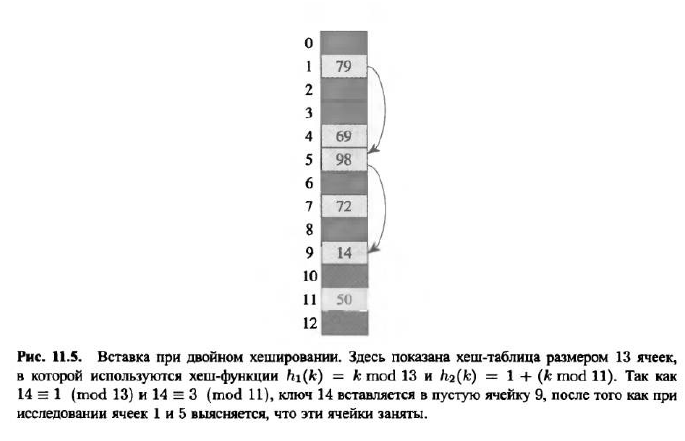

## 3 Построение хеш-функций

### 3.1 Метод деления

Построение хеш-функции*** методом деления ***состоит в отображении ключа ***k*** в одну из *m* ячеек путем получения остатка от деления ***k*** на ***m***, т.е. хеш-функция иммет вид:
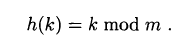

### 3.2 Метод умножения

Построение хеш-функции ***методом умножения*** выполняется в 2 этапа: сначала нужно умножить ключ ***k*** на константу ***0 < A < 1*** и выделить дробную часть полученного произведения. Затем умножить полученное значение на ***m*** и применить к нему функцию **'пол'**.

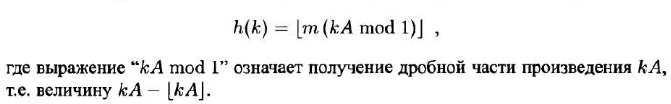

### 3.3 Универсальное хеширование

Идея состоит в ***случайном выборе хеш-функции*** из некоторого тщательно отобранного класса функций в начале работы программы.

Такое множество хеш-функций называется ***универсальным***.

## 4 Идеальное хеширование

Используется ***двухуровневая схема хеширования*** с универсальным хешированием на каждом уровне.

Время поиска $O(1)$ в наихудшем случае.

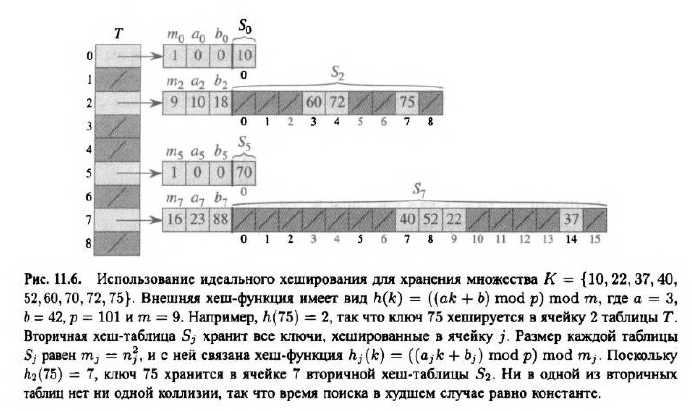

***Первый уровень***: ***n*** ключей хешируется в ***m*** ячеек с использованием хеш-функции **h**, выбранной из семейства универсальных хеш-функций.

***Второй уровень***: ключи, хешированные в ячейку ***j***, помещаются во вторичную хеш-таблицу $S_j$ со связанной с ней хеш-функцией $h_j$.


Чтобы гарантировать отсутствие коллизий на втором уровне, требуется, чтобы размер ***$m_j$*** хеш-таблицы **$S_j$** был равен квадрату числа ***$n_j$*** ключей, хешированных в ячейку ***j***.

# Бинарные деревья поиска

## 1 Общее описание

Являются бинарными деревьями со следующими атрибутами: ***key***, ***left***, ***right***, ***parent***.

Ключи в бинарном дереве поиска хранятся таким образом, чтобы в любой момент удовлетворять следующему ***свойству бинарного дерева поиска***:

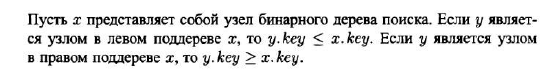

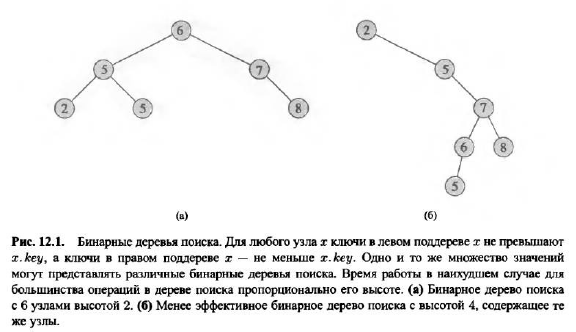

## 2 Вставка

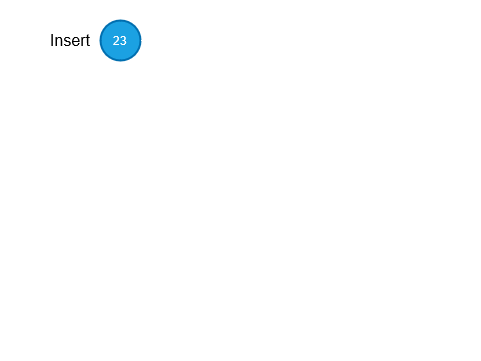

## 3 Центрированный обход дерева (inorder tree walk)

Свойство бинарного дерева поиска позволяет вывести все ключи, находящиеся в дереве, в отсортированном порядке с помощью рекурсивного алгоритма - ***центрированного (симметричного) обхода дерева (inorder tree walk)***, время работы которого $\theta(n)$:

In [ ]:
import dataclasses
from typing import Any, Optional


@dataclasses.dataclass
class Node:
    key: Any
    data: Any
    left: Optional["Node"] = None
    right: Optional["Node"] = None
    parent: Optional["Node"] = None


class DuplicateKeyError(Exception):
    def __init__(self, key: str) -> None:
        Exception.__init__(self, f"{key} already exists.")


class BinTreeSearch:
    def __init__(self) -> None:
        self.root: Optional["Node"] = None
    
    def insert(self, key: Any, data: Any) -> None:
        new_node = Node(key=key, data=data)
        parent: Optional["Node"] = None
        current: Optional["Node"] = self.root
        while current:
            parent = current
            if new_node.key < current.key:
                current = current.left
            elif new_node.key > current.key:
                current = current.right
            else:
                raise DuplicateKeyError(key=new_node.key)
        new_node.parent = parent
        # if tree is empty
        if parent is None:
            self.root = new_node
        elif new_node.key < parent.key:
            parent.left = new_node
        else:
            parent.right = new_node

    def inorder_walk(self, root):
        current = root
        if current:
            self.inorder_walk(current.left)
            print(current.key)
            self.inorder_walk(current.right)


if __name__=='__main__':
    b = BinTreeSearch()
    b.insert(50, 'This is fifty')
    b.insert(10, 'This is ten')
    b.insert(70, 'This is seventy')

    b.inorder_walk(b.root)

10
50
70


## 4 Поиск

Время работы операции поиска $O(h)$, где $h$ - высота дерева.

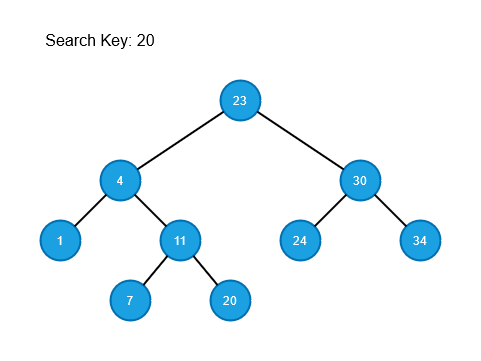

In [1]:
import dataclasses
from typing import Any, Optional


@dataclasses.dataclass
class Node:
    key: Any
    data: Any
    left: Optional["Node"] = None
    right: Optional["Node"] = None
    parent: Optional["Node"] = None


class DuplicateKeyError(Exception):
    def __init__(self, key: str) -> None:
        Exception.__init__(self, f"{key} already exists.")


class BinTreeSearch:
    def __init__(self) -> None:
        self.root: Optional["Node"] = None

    def search(self, key: Any) -> Optional["Node"]:
        current = self.root
        while current and key != current.key:
            if key < current.key:
                current = current.left
            else:
                current = current.right
        return current
    
    def insert(self, key: Any, data: Any) -> None:
        new_node = Node(key=key, data=data)
        parent: Optional["Node"] = None
        current: Optional["Node"] = self.root
        while current:
            parent = current
            if new_node.key < current.key:
                current = current.left
            elif new_node.key > current.key:
                current = current.right
            else:
                raise DuplicateKeyError(key=new_node.key)
        new_node.parent = parent
        # if tree is empty
        if parent is None:
            self.root = new_node
        elif new_node.key < parent.key:
            parent.left = new_node
        else:
            parent.right = new_node


if __name__=='__main__':
    b = BinTreeSearch()
    b.insert(50, 'This is fifty')
    b.insert(10, 'This is ten')
    b.insert(70, 'This is seventy')
    print(b.search(10))

Node(key=10, data='This is ten', left=None, right=None, parent=Node(key=50, data='This is fifty', left=..., right=Node(key=70, data='This is seventy', left=None, right=None, parent=...), parent=None))


## 5 Минимум и максимум

Время работы: $O(h)$, где $h$ - высота дерева.

In [3]:
import dataclasses
from typing import Any, Optional, Union


@dataclasses.dataclass
class Node:
    key: Any
    data: Any
    left: Optional["Node"] = None
    right: Optional["Node"] = None
    parent: Optional["Node"] = None


class DuplicateKeyError(Exception):
    def __init__(self, key: str) -> None:
        Exception.__init__(self, f"{key} already exists.")


class BinTreeSearch:
    def __init__(self) -> None:
        self.root: Optional["Node"] = None
    
    def insert(self, key: Any, data: Any) -> None:
        new_node = Node(key=key, data=data)
        parent: Optional["Node"] = None
        current: Optional["Node"] = self.root
        while current:
            parent = current
            if new_node.key < current.key:
                current = current.left
            elif new_node.key > current.key:
                current = current.right
            else:
                raise DuplicateKeyError(key=new_node.key)
        new_node.parent = parent
        # if tree is empty
        if parent is None:
            self.root = new_node
        elif new_node.key < parent.key:
            parent.left = new_node
        else:
            parent.right = new_node

    def inorder_walk(self, root: Optional["Node"]) -> None:
        current = root
        if current:
            self.inorder_walk(current.left)
            print(current.key)
            self.inorder_walk(current.right)

    def minimum(self, node: Optional["Node"]) -> Optional["Node"]:
        """the method returns a pointer to the minimum element of the subtree"""
        while node.left:
            node = node.left
        return node

    def maximum(self, node: Optional["Node"]) -> Optional["Node"]:
        """the method returns a pointer to the maximum element of the subtree"""
        while node.right:
            node = node.right
        return node


if __name__=='__main__':
    b = BinTreeSearch()
    b.insert(50, 'This is fifty')
    b.insert(10, 'This is ten')
    b.insert(70, 'This is seventy')
    b.insert(15, 'This is fifteen')
    b.insert(30, 'This is thirty')
    b.insert(40, 'This is fourty')
    b.insert(60, 'This is sixty')
    b.insert(77, 'This is seventy seven')
    b.inorder_walk(b.root)

    print(f'Maximum: {b.maximum(b.root)}')
    print(f'Minimum: {b.minimum(b.root)}')


10
15
30
40
50
60
70
77
Maximum: Node(key=77, data='This is seventy seven', left=None, right=None, parent=Node(key=70, data='This is seventy', left=Node(key=60, data='This is sixty', left=None, right=None, parent=...), right=..., parent=Node(key=50, data='This is fifty', left=Node(key=10, data='This is ten', left=None, right=Node(key=15, data='This is fifteen', left=None, right=Node(key=30, data='This is thirty', left=None, right=Node(key=40, data='This is fourty', left=None, right=None, parent=...), parent=...), parent=...), parent=...), right=..., parent=None)))
Minimum: Node(key=10, data='This is ten', left=None, right=Node(key=15, data='This is fifteen', left=None, right=Node(key=30, data='This is thirty', left=None, right=Node(key=40, data='This is fourty', left=None, right=None, parent=...), parent=...), parent=...), parent=Node(key=50, data='This is fifty', left=..., right=Node(key=70, data='This is seventy', left=Node(key=60, data='This is sixty', left=None, right=None, parent=

## 6 Предшествующий и последующий элементы

Операции $successor$ и $predecessor$ позволяют определить последующий и предшествующий узлы соответственно.

***Время работы*** $O(h)$, где $h$ - высота дерева.

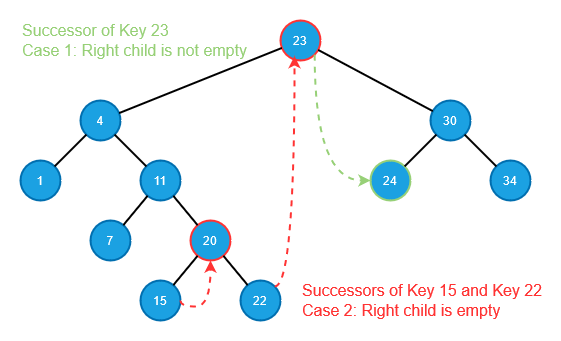

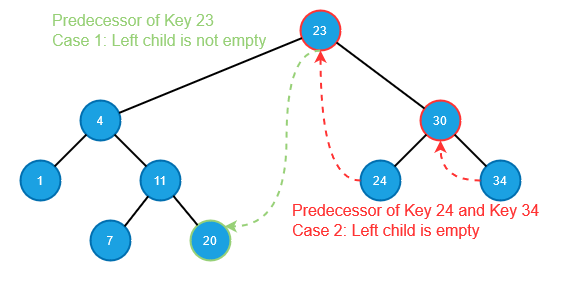

In [1]:
import dataclasses
from typing import Any, Optional, Union


@dataclasses.dataclass
class Node:
    key: Any
    data: Any
    left: Optional["Node"] = None
    right: Optional["Node"] = None
    parent: Optional["Node"] = None


class DuplicateKeyError(Exception):
    def __init__(self, key: str) -> None:
        Exception.__init__(self, f"{key} already exists.")


class BinTreeSearch:
    def __init__(self) -> None:
        self.root: Optional["Node"] = None

    def search(self, key: Any) -> Optional["Node"]:
        """the method gets the key and returns a pointer to the node with this key """
        current = self.root
        while current and key != current.key:
            if key < current.key:
                current = current.left
            else:
                current = current.right
        return current
    
    def insert(self, key: Any, data: Any) -> None:
        new_node = Node(key=key, data=data)
        parent: Optional["Node"] = None
        current: Optional["Node"] = self.root
        while current:
            parent = current
            if new_node.key < current.key:
                current = current.left
            elif new_node.key > current.key:
                current = current.right
            else:
                raise DuplicateKeyError(key=new_node.key)
        new_node.parent = parent
        # if tree is empty
        if parent is None:
            self.root = new_node
        elif new_node.key < parent.key:
            parent.left = new_node
        else:
            parent.right = new_node

    def inorder_walk(self, root: Optional["Node"]) -> None:
        current = root
        if current:
            self.inorder_walk(current.left)
            print(current.key)
            self.inorder_walk(current.right)

    def minimum(self, node: Optional["Node"]) -> Optional["Node"]:
        """the method returns a pointer to the minimum element of the subtree"""
        while node.left:
            node = node.left
        return node

    def maximum(self, node: Optional["Node"]) -> Optional["Node"]:
        """the method returns a pointer to the maximum element of the subtree"""
        while node.right:
            node = node.right
        return node

    def successor(self, node: Optional["Node"]) -> Optional["Node"]:
        """
        the method gets a pointer to the node and returns a pointer to the
        successor-node
        """
        if node.right:
            return self.minimum(node.right)
        res = node.parent
        while res and node == res.right:
            node = res
            res = res.parent
        return res

    def predecessor(self, node: Optional["Node"]) -> Optional["Node"]:
        """
        the method gets a pointer to the node and returns a pointer to the
        predecessor-node
        """
        if node.left:
            return self.maximum(node.left)
        res = node.parent
        while res and node == res.left:
            node = res
            res = res.parent
        return res


if __name__=='__main__':
    b = BinTreeSearch()
    b.insert(50, 'This is fifty')
    b.insert(10, 'This is ten')
    b.insert(70, 'This is seventy')
    b.insert(15, 'This is fifteen')
    b.insert(30, 'This is thirty')
    b.insert(40, 'This is fourty')
    b.insert(60, 'This is sixty')
    b.insert(77, 'This is seventy seven')
    b.inorder_walk(b.root)

    print(f'Successor of the node "50": {b.successor(b.search(50))}')
    print(f'Predecessor of the node "50": {b.predecessor(b.search(50))}')

10
15
30
40
50
60
70
77
Successor of the node "50": Node(key=60, data='This is sixty', left=None, right=None, parent=Node(key=70, data='This is seventy', left=..., right=Node(key=77, data='This is seventy seven', left=None, right=None, parent=...), parent=Node(key=50, data='This is fifty', left=Node(key=10, data='This is ten', left=None, right=Node(key=15, data='This is fifteen', left=None, right=Node(key=30, data='This is thirty', left=None, right=Node(key=40, data='This is fourty', left=None, right=None, parent=...), parent=...), parent=...), parent=...), right=..., parent=None)))
Predecessor of the node "50": Node(key=40, data='This is fourty', left=None, right=None, parent=Node(key=30, data='This is thirty', left=None, right=..., parent=Node(key=15, data='This is fifteen', left=None, right=..., parent=Node(key=10, data='This is ten', left=None, right=..., parent=Node(key=50, data='This is fifty', left=..., right=Node(key=70, data='This is seventy', left=Node(key=60, data='This is s